In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Dataset was downloaded from Kaggle.com (https://www.kaggle.com/c/nlp-getting-started/overview). The task was to classify if a given tweet is referencing to a disaster or not. 

In [2]:
tweets=pd.read_csv('train.csv')

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.shape

(7613, 5)

Text preprocessing methods and comments from: https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [5]:
pd.set_option('display.max_colwidth', None)
tweets=tweets[['text','target']]
tweets.head()

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [6]:
tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<H4>Punctuation Removal: </H4>

In this step, all the punctuations from the text are removed. String library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [7]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
tweets['text']=tweets['text'].apply(lambda x:remove_punctuation(x))
tweets.head()

,text,target
0,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,13000 people receive wildfires evacuation orders in California,1
4,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1


<H4>Lowercasing text:</H4>

In [9]:
tweets['text']=tweets['text'].apply(lambda x: str.lower(x))
tweets.head()

,text,target
0,our deeds are the reason of this earthquake may allah forgive us all,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected,1
3,13000 people receive wildfires evacuation orders in california,1
4,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1


<H4>Tokenization: </H4>

In this step, the text is split into smaller units - in our case it will be word tokenization.
Tokenization will be performed using nltk library.

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
tweets['text']=tweets['text'].apply(lambda x: word_tokenize(x))
tweets.head()

,text,target
0,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]",1
1,"[forest, fire, near, la, ronge, sask, canada]",1
2,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, evacuation, or, shelter, in, place, orders, are, expected]",1
3,"[13000, people, receive, wildfires, evacuation, orders, in, california]",1
4,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, school]",1


<H4>Stop word removal: </H4>

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis.

In [12]:
from nltk.corpus import stopwords

In [13]:
stop_words=set(stopwords.words('english'))

In [14]:
def stop_word_remove(text):
    no_stop_words=[word for word in text if word not in stop_words]
    return no_stop_words

In [15]:
tweets['text']=tweets['text'].apply(lambda x:stop_word_remove(x))
tweets.head()

,text,target
0,"[deeds, reason, earthquake, may, allah, forgive, us]",1
1,"[forest, fire, near, la, ronge, sask, canada]",1
2,"[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]",1
3,"[13000, people, receive, wildfires, evacuation, orders, california]",1
4,"[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school]",1


<H4>Stemming: </H4>

Step where the words are stemmed or diminished to their root/base form.

In [16]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [17]:
def stemming(text):
    stemmed=[stemmer.stem(token) for token in text]
    return stemmed

In [18]:
tweets['text']=tweets['text'].apply(lambda x:stemming(x))
tweets.head()

,text,target
0,"[deed, reason, earthquak, may, allah, forgiv, us]",1
1,"[forest, fire, near, la, rong, sask, canada]",1
2,"[resid, ask, shelter, place, notifi, offic, evacu, shelter, place, order, expect]",1
3,"[13000, peopl, receiv, wildfir, evacu, order, california]",1
4,"[got, sent, photo, rubi, alaska, smoke, wildfir, pour, school]",1


<H4>Lemmatization</H4>

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [20]:
def lemmatizing(text):
    lemmatized=[lemmatizer.lemmatize(token) for token in text]
    return lemmatized

In [21]:
tweets['text']=tweets['text'].apply(lambda x:lemmatizing(x))
tweets.head()

,text,target
0,"[deed, reason, earthquak, may, allah, forgiv, u]",1
1,"[forest, fire, near, la, rong, sask, canada]",1
2,"[resid, ask, shelter, place, notifi, offic, evacu, shelter, place, order, expect]",1
3,"[13000, peopl, receiv, wildfir, evacu, order, california]",1
4,"[got, sent, photo, rubi, alaska, smoke, wildfir, pour, school]",1


In [22]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([word for word in x]))

 Vectorizing data using <b>Bag of Words</b> (based on: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)
- BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1))
text_counts= cv.fit_transform(tweets['text'])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, tweets['target'], test_size=0.3, random_state=1)

ML model - Multinomial Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, clf.predict(X_test)),3))

MultinomialNB Accuracy: 0.8


Vectorizing data using <b>TF-IDF</b> (Term Frequency - Inverse Document Frequency)

The TF-IDF algorithm is used to weigh a word in any content and assign importance to that word based on the number of times it appears in the document (like BoW), bu also it checks how relevant the keyword is throughout the whole document (in this case all sentences in dataframe), which is referred to as corpus.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(tweets['text'])

In [36]:
#print(text_tf)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, tweets['target'], test_size=0.3, random_state=123)

ML model - Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, clf.predict(X_test)),3))

MultinomialNB Accuracy: 0.802


Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
print("Model accuracy score:", round(lr_model.score(X_test,y_test),2))
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_model.predict(X_test)))

Model accuracy score: 0.79
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1313
           1       0.83      0.64      0.72       971

    accuracy                           0.79      2284
   macro avg       0.80      0.77      0.78      2284
weighted avg       0.80      0.79      0.79      2284



K-Nearest Neighbors - default parameters

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
print("Model accuracy score:", round(knn_model.score(X_test,y_test),2))
print(classification_report(y_test,knn_model.predict(X_test)))

Model accuracy score: 0.77
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1313
           1       0.79      0.63      0.70       971

    accuracy                           0.77      2284
   macro avg       0.77      0.75      0.76      2284
weighted avg       0.77      0.77      0.77      2284



Training accuraccy:

In [41]:
accuracies = []
for k in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_train, y_train))

In [42]:
k_list = range(1,100)

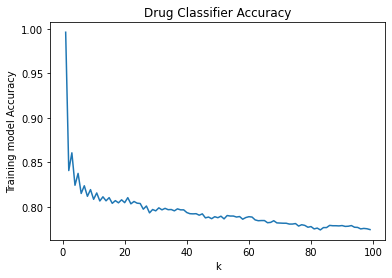

In [43]:
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Training model Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

Testing accuraccy:

In [44]:
accuracies_test = []
for k in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies_test.append(classifier.score(X_test,y_test))

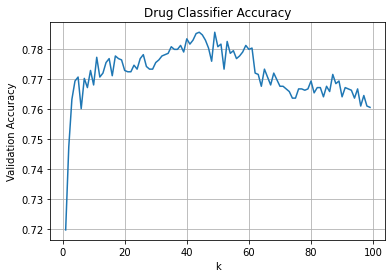

In [45]:
k_list = range(1,100)
plt.plot(k_list, accuracies_test)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Drug Classifier Accuracy')
plt.grid()
plt.show()

In [46]:
print("Number of neighbors for best knn model accuracy:", accuracies_test.index(max(accuracies_test)))

Number of neighbors for best knn model accuracy: 43


Knn for 43 neighbors

In [47]:
knn_model=KNeighborsClassifier(n_neighbors = 43)
knn_model.fit(X_train,y_train)
print("Model accuracy score:", round(knn_model.score(X_test,y_test),2))
print(classification_report(y_test,knn_model.predict(X_test)))

Model accuracy score: 0.79
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1313
           1       0.80      0.66      0.72       971

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.77      2284
weighted avg       0.79      0.79      0.78      2284

